In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("flights_2019.csv")
df.head()

,carrier_code,flight_number,origin_airport,destination_airport,date,scheduled_elapsed_time,tail_number,departure_delay,arrival_delay,delay_carrier,...,HourlyPrecipitation_x,HourlyStationPressure_x,HourlyVisibility_x,HourlyWindSpeed_x,STATION_y,HourlyDryBulbTemperature_y,HourlyPrecipitation_y,HourlyStationPressure_y,HourlyVisibility_y,HourlyWindSpeed_y
0,AS,121,SEA,ANC,2019-08-01,215,N459AS,22,9,0,...,0.0,29.53,10.0,6.0,7.027253e+10,57.0,0.0,29.88,10.0,5.0
1,B6,1092,BQN,FLL,2019-08-01,155,N561JB,2,-3,0,...,NaN,29.80,1.5,20.0,7.478301e+10,84.0,0.0,29.95,10.0,14.0
2,B6,668,PSE,MCO,2019-08-01,175,N534JB,0,0,0,...,NaN,NaN,NaN,NaN,7.220501e+10,75.0,0.0,29.92,10.0,0.0
3,F9,402,LAX,DEN,2019-08-01,143,N715FR,52,40,19,...,0.0,29.62,10.0,7.0,7.256500e+10,63.0,0.0,24.73,10.0,7.0
4,F9,662,SFO,DEN,2019-08-01,152,N338FR,85,63,10,...,0.0,29.96,10.0,9.0,7.256500e+10,62.0,0.0,24.74,10.0,7.0


In [3]:
def sample_month(group):
    if len(group) > 100000:
        return group.sample(n=10000, random_state=42)
    else:
        return group

# Group by 'month' and apply the sampling
df = df.groupby('month').apply(sample_month).reset_index(drop=True)
df.size

/tmp/ipykernel_78996/549360265.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('month').apply(sample_month).reset_index(drop=True)


2800000

In [4]:
df['carrier_code'].unique()

array(['DL', 'UA', 'WN', 'AA', 'B6', 'NK', 'AS', 'G4', 'HA', 'F9'],
      dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   carrier_code                    80000 non-null  object 
 1   flight_number                   80000 non-null  int64  
 2   origin_airport                  80000 non-null  object 
 3   destination_airport             80000 non-null  object 
 4   date                            80000 non-null  object 
 5   scheduled_elapsed_time          80000 non-null  int64  
 6   tail_number                     79822 non-null  object 
 7   departure_delay                 80000 non-null  int64  
 8   arrival_delay                   80000 non-null  int64  
 9   delay_carrier                   80000 non-null  int64  
 10  delay_weather                   80000 non-null  int64  
 11  delay_national_aviation_system  80000 non-null  int64  
 12  delay_security                  

In [6]:
missing_values = df.isnull().sum()
missing_values

carrier_code                         0
flight_number                        0
origin_airport                       0
destination_airport                  0
date                                 0
scheduled_elapsed_time               0
tail_number                        178
departure_delay                      0
arrival_delay                        0
delay_carrier                        0
delay_weather                        0
delay_national_aviation_system       0
delay_security                       0
delay_late_aircarft_arrival          0
cancelled_code                       0
year                                 0
month                                0
day                                  0
weekday                              0
scheduled_departure_dt               0
scheduled_arrival_dt                 0
actual_departure_dt               1164
actual_arrival_dt                 1238
STATION_x                           30
HourlyDryBulbTemperature_x          30
HourlyPrecipitation_x    

In [7]:
df = df.dropna(subset=['actual_departure_dt', 'actual_arrival_dt'])
df = df.dropna(subset=['HourlyPrecipitation_x', 'HourlyPrecipitation_y'])
df = df.drop("cancelled_code",axis=1)

In [8]:
df = df.drop("tail_number",axis=1)

In [9]:
missing_values = df.isnull().sum()
missing_values

carrier_code                      0
flight_number                     0
origin_airport                    0
destination_airport               0
date                              0
scheduled_elapsed_time            0
departure_delay                   0
arrival_delay                     0
delay_carrier                     0
delay_weather                     0
delay_national_aviation_system    0
delay_security                    0
delay_late_aircarft_arrival       0
year                              0
month                             0
day                               0
weekday                           0
scheduled_departure_dt            0
scheduled_arrival_dt              0
actual_departure_dt               0
actual_arrival_dt                 0
STATION_x                         0
HourlyDryBulbTemperature_x        0
HourlyPrecipitation_x             0
HourlyStationPressure_x           0
HourlyVisibility_x                0
HourlyWindSpeed_x                 0
STATION_y                   

In [10]:
df['carrier_code'].unique()

array(['DL', 'UA', 'WN', 'AA', 'B6', 'NK', 'AS', 'G4', 'HA', 'F9'],
      dtype=object)

In [11]:
df['carrier_code'] = df['carrier_code'].astype('category')
df.head()

,carrier_code,flight_number,origin_airport,destination_airport,date,scheduled_elapsed_time,departure_delay,arrival_delay,delay_carrier,delay_weather,...,HourlyPrecipitation_x,HourlyStationPressure_x,HourlyVisibility_x,HourlyWindSpeed_x,STATION_y,HourlyDryBulbTemperature_y,HourlyPrecipitation_y,HourlyStationPressure_y,HourlyVisibility_y,HourlyWindSpeed_y
0,DL,4291,DTW,IMT,2019-05-07,88,-8,-15,0,0,...,0.01,29.54,10.0,9.0,7.274379e+10,50.0,0.0,29.04,10.0,3.0
1,UA,756,DEN,MCI,2019-05-01,99,-9,-11,0,0,...,0.01,24.59,6.0,11.0,7.244600e+10,62.0,0.0,28.87,10.0,3.0
2,WN,2903,MCO,PIT,2019-05-04,135,-7,0,0,0,...,0.00,29.88,9.0,3.0,7.252009e+10,59.0,0.0,28.64,8.0,0.0
3,AA,2367,DFW,SLC,2019-05-14,173,-3,-15,0,0,...,0.00,29.38,10.0,7.0,7.257202e+10,79.0,0.0,25.71,10.0,14.0
4,AA,4051,SYR,ORD,2019-05-20,132,-8,-18,0,0,...,0.00,29.28,10.0,10.0,7.253009e+10,52.0,0.0,29.37,10.0,10.0


In [12]:
df['origin_airport'].nunique()

359

In [13]:
df['destination_airport'].nunique()

359

In [14]:
# Combine both columns to get all unique airport codes
all_airports = pd.concat([df['origin_airport'], df['destination_airport']])

# Get unique values and assign integer codes
airport_to_code = {airport: idx for idx, airport in enumerate(all_airports.unique())}

# Map the same codes to both columns
df['origin_airport_code'] = df['origin_airport'].map(airport_to_code)
df['destination_airport_code'] = df['destination_airport'].map(airport_to_code)

In [15]:
df = df.drop("origin_airport",axis=1)
df = df.drop("destination_airport",axis=1)
df.head()

,carrier_code,flight_number,date,scheduled_elapsed_time,departure_delay,arrival_delay,delay_carrier,delay_weather,delay_national_aviation_system,delay_security,...,HourlyVisibility_x,HourlyWindSpeed_x,STATION_y,HourlyDryBulbTemperature_y,HourlyPrecipitation_y,HourlyStationPressure_y,HourlyVisibility_y,HourlyWindSpeed_y,origin_airport_code,destination_airport_code
0,DL,4291,2019-05-07,88,-8,-15,0,0,0,0,...,10.0,9.0,7.274379e+10,50.0,0.0,29.04,10.0,3.0,0,259
1,UA,756,2019-05-01,99,-9,-11,0,0,0,0,...,6.0,11.0,7.244600e+10,62.0,0.0,28.87,10.0,3.0,1,21
2,WN,2903,2019-05-04,135,-7,0,0,0,0,0,...,9.0,3.0,7.252009e+10,59.0,0.0,28.64,8.0,0.0,2,69
3,AA,2367,2019-05-14,173,-3,-15,0,0,0,0,...,10.0,7.0,7.257202e+10,79.0,0.0,25.71,10.0,14.0,3,24
4,AA,4051,2019-05-20,132,-8,-18,0,0,0,0,...,10.0,10.0,7.253009e+10,52.0,0.0,29.37,10.0,10.0,4,33


In [16]:
df = df.drop("STATION_x",axis=1)
df = df.drop("STATION_y",axis=1)
df.head()

,carrier_code,flight_number,date,scheduled_elapsed_time,departure_delay,arrival_delay,delay_carrier,delay_weather,delay_national_aviation_system,delay_security,...,HourlyStationPressure_x,HourlyVisibility_x,HourlyWindSpeed_x,HourlyDryBulbTemperature_y,HourlyPrecipitation_y,HourlyStationPressure_y,HourlyVisibility_y,HourlyWindSpeed_y,origin_airport_code,destination_airport_code
0,DL,4291,2019-05-07,88,-8,-15,0,0,0,0,...,29.54,10.0,9.0,50.0,0.0,29.04,10.0,3.0,0,259
1,UA,756,2019-05-01,99,-9,-11,0,0,0,0,...,24.59,6.0,11.0,62.0,0.0,28.87,10.0,3.0,1,21
2,WN,2903,2019-05-04,135,-7,0,0,0,0,0,...,29.88,9.0,3.0,59.0,0.0,28.64,8.0,0.0,2,69
3,AA,2367,2019-05-14,173,-3,-15,0,0,0,0,...,29.38,10.0,7.0,79.0,0.0,25.71,10.0,14.0,3,24
4,AA,4051,2019-05-20,132,-8,-18,0,0,0,0,...,29.28,10.0,10.0,52.0,0.0,29.37,10.0,10.0,4,33


In [17]:
df['flight_number'].nunique()

6523

In [18]:
df = df.drop("year",axis=1)
df = df.drop("flight_number",axis=1)
df = df.drop("scheduled_elapsed_time",axis=1)

In [19]:
# Convert to datetime
df['scheduled_departure_dt'] = pd.to_datetime(df['scheduled_departure_dt'])
df['scheduled_arrival_dt'] = pd.to_datetime(df['scheduled_arrival_dt'])

# Feature Engineering
df['departure_hour'] = df['scheduled_departure_dt'].dt.hour
df['arrival_hour'] = df['scheduled_arrival_dt'].dt.hour
df['is_weekend'] = df['weekday'].isin([5,6]).astype(int)

In [20]:
df = df[df['arrival_delay'].between(-10, 300)]

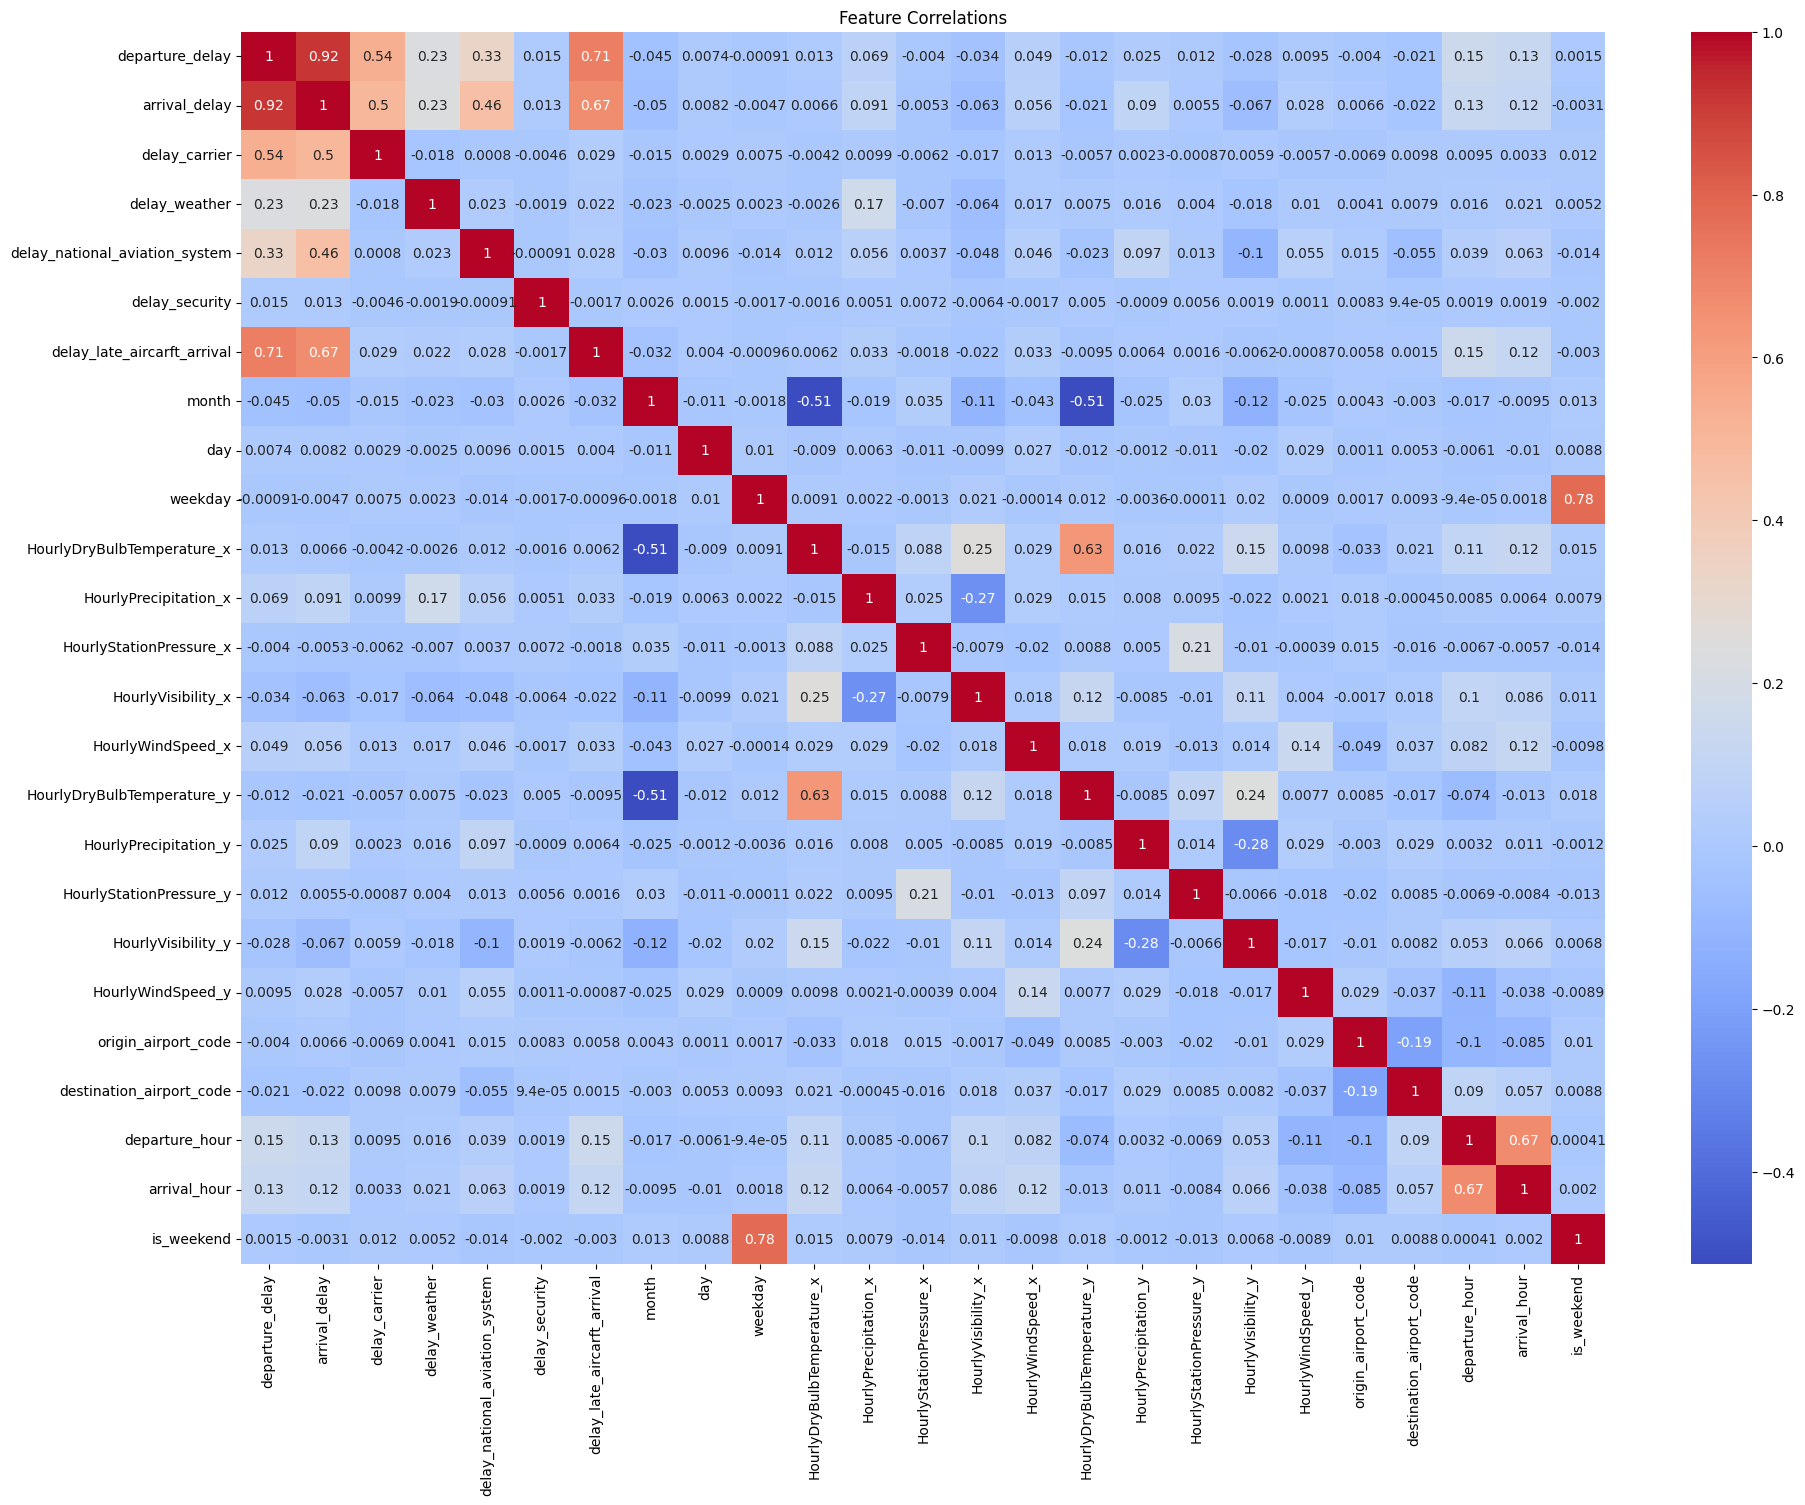

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(22, 16))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlations")
plt.show()

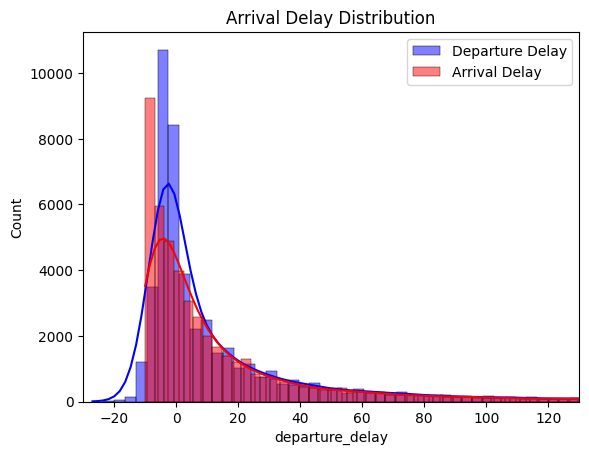

In [22]:
sns.histplot(df["departure_delay"], bins=100, kde=True, color="blue", label="Departure Delay")
sns.histplot(df["arrival_delay"], bins=100, kde=True, color="red", label="Arrival Delay")
plt.title("Arrival Delay Distribution")
plt.xlim(-30, 130)
plt.legend()
plt.show()

/tmp/ipykernel_78996/959855921.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["carrier_code"], y=df["arrival_delay"], estimator=lambda x: x.mean(), palette="viridis")


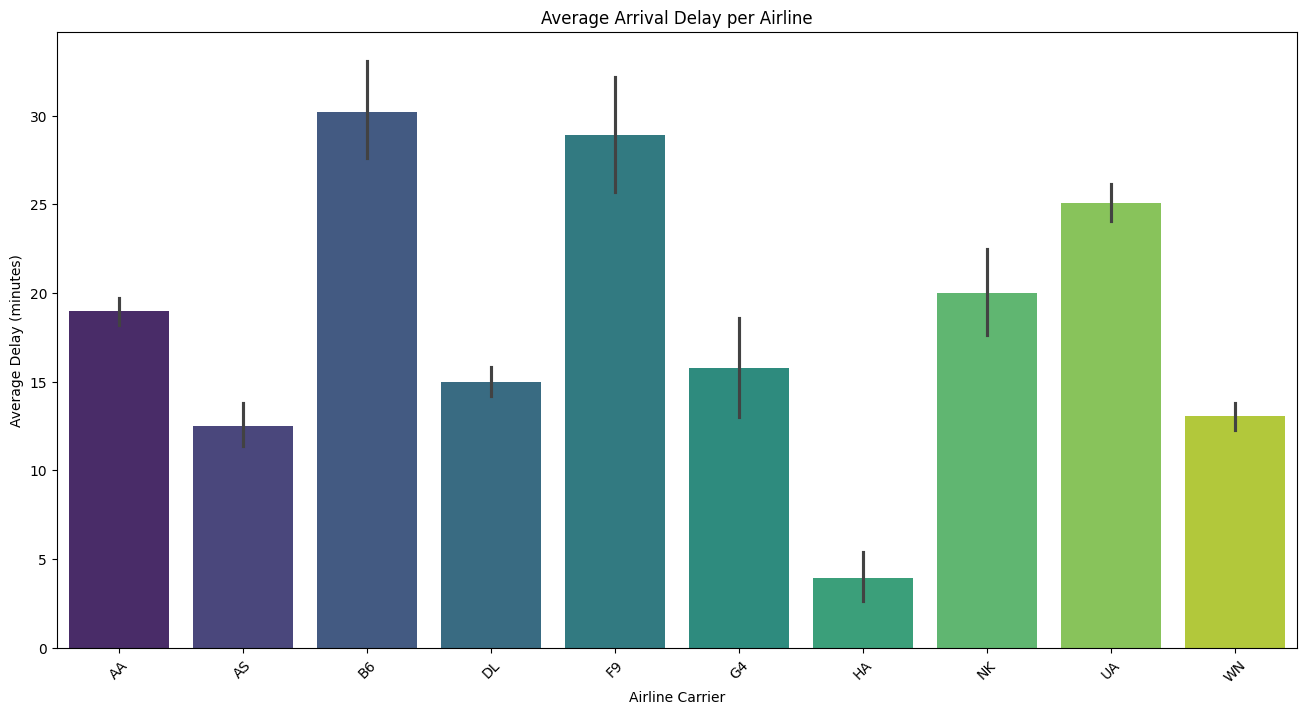

In [23]:
plt.figure(figsize=(16, 8))
sns.barplot(x=df["carrier_code"], y=df["arrival_delay"], estimator=lambda x: x.mean(), palette="viridis")
plt.title("Average Arrival Delay per Airline")
plt.xlabel("Airline Carrier")
plt.ylabel("Average Delay (minutes)")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_78996/1731689375.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


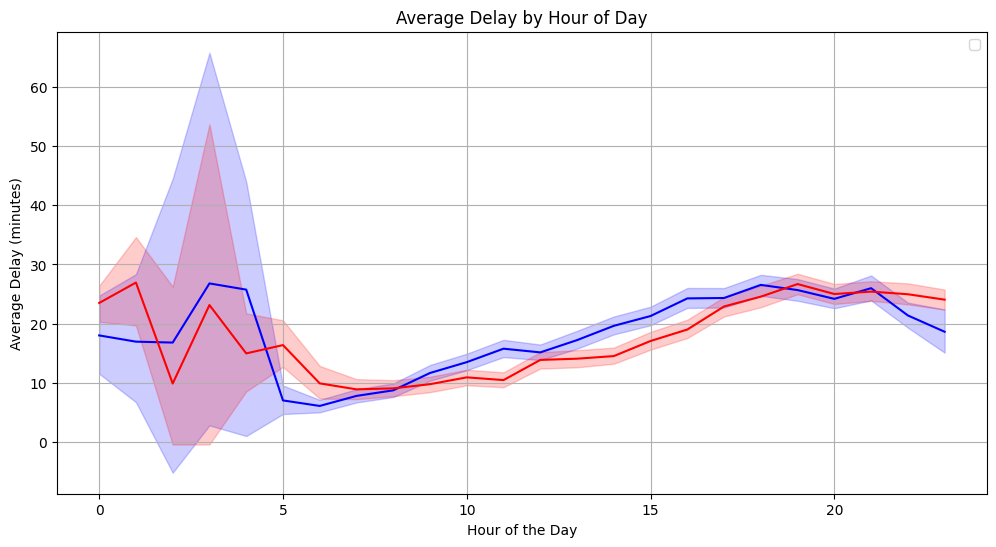

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["departure_hour"], y=df["departure_delay"], estimator=lambda x: x.mean(), color="blue")
sns.lineplot(x=df["arrival_hour"], y=df["arrival_delay"], estimator=lambda x: x.mean(), color="red")
plt.title("Average Delay by Hour of Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Delay (minutes)")
plt.legend()
plt.grid()
plt.show()

In [25]:
df['carrier_code'] = df['carrier_code'].astype('category').cat.codes

In [26]:
#df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.drop(['scheduled_departure_dt','scheduled_arrival_dt','actual_departure_dt','actual_arrival_dt','date','delay_national_aviation_system','delay_security','delay_late_aircarft_arrival'],axis=1)
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48196 entries, 2 to 79999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   carrier_code                48196 non-null  int8   
 1   departure_delay             48196 non-null  int64  
 2   arrival_delay               48196 non-null  int64  
 3   delay_carrier               48196 non-null  int64  
 4   delay_weather               48196 non-null  int64  
 5   month                       48196 non-null  int64  
 6   day                         48196 non-null  int64  
 7   weekday                     48196 non-null  int64  
 8   HourlyDryBulbTemperature_x  48196 non-null  float64
 9   HourlyPrecipitation_x       48196 non-null  float64
 10  HourlyStationPressure_x     48196 non-null  float64
 11  HourlyVisibility_x          48196 non-null  float64
 12  HourlyWindSpeed_x           48196 non-null  float64
 13  HourlyDryBulbTemperature_y  48196 no

In [27]:
df.size

1108508

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
# features = ['departure_hour','day','month','is_weekend','HourlyDryBulbTemperature_x','HourlyWindSpeed_x','HourlyPrecipitation_x','HourlyVisibility_y','HourlyStationPressure_y','']
# X = df[features]
# y = df['arrival_delay']

X = df.drop(['arrival_delay'],axis=1)
y = df['arrival_delay']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error

lgb_model = lgb.LGBMRegressor(n_estimators=100)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
print(f"Random Forest: MAE = {mean_absolute_error(y_test, y_pred_lgb):.4f}, R² = {r2_score(y_test, y_pred_lgb):.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2108
[LightGBM] [Info] Number of data points in the train set: 33737, number of used features: 22
[LightGBM] [Info] Start training from score 18.249607
Random Forest: MAE = 8.4615, R² = 0.8722


In [32]:
#Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(f"Random Forest: MAE = {mean_absolute_error(y_test, y_pred_rf):.4f}, R² = {r2_score(y_test, y_pred_rf):.4f}")

Random Forest: MAE = 8.9260, R² = 0.8644


In [33]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# Train Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print(f"Gradient Boosting: MAE = {mean_absolute_error(y_test, y_pred_gb):.4f}, R² = {r2_score(y_test, y_pred_gb):.4f}")

Gradient Boosting: MAE = 8.6344, R² = 0.8680


In [34]:
import xgboost as xgb
# Train XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print(f"XGBoost: MAE = {mean_absolute_error(y_test, y_pred_xgb):.4f}, R² = {r2_score(y_test, y_pred_xgb):.4f}")

XGBoost: MAE = 8.7166, R² = 0.8652


In [35]:
from dowhy import CausalModel
from doubleml import DoubleMLData, DoubleMLPLR
from sklearn.linear_model import Lasso
from econml.dml import CausalForestDML
from sklearn.linear_model import Lasso

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
feature_names = [col for col in df.columns if col != 'arrival_delay']
# X = df[feature_names]
# y = df["transit_delay"]

# Train a Gradient Boosting model to extract feature importance
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X, y)

# Extract feature importance scores
feature_importance_dict = dict(zip(feature_names, gb_model.feature_importances_))

# Rank features based on importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print("\n===== Ranked Features Contributing to Transit Delay (Using Feature Importance) =====")
for rank, (feature, importance) in enumerate(sorted_features, start=1):
    print(f"Rank {rank}: {feature} (Importance: {importance:.4f})")


===== Ranked Features Contributing to Transit Delay (Using Feature Importance) =====
Rank 1: departure_delay (Importance: 0.9674)
Rank 2: delay_carrier (Importance: 0.0108)
Rank 3: HourlyPrecipitation_y (Importance: 0.0092)
Rank 4: delay_weather (Importance: 0.0027)
Rank 5: HourlyPrecipitation_x (Importance: 0.0014)
Rank 6: HourlyDryBulbTemperature_x (Importance: 0.0012)
Rank 7: carrier_code (Importance: 0.0011)
Rank 8: HourlyVisibility_y (Importance: 0.0010)
Rank 9: destination_airport_code (Importance: 0.0010)
Rank 10: weekday (Importance: 0.0006)
Rank 11: HourlyVisibility_x (Importance: 0.0006)
Rank 12: HourlyWindSpeed_y (Importance: 0.0006)
Rank 13: arrival_hour (Importance: 0.0006)
Rank 14: HourlyStationPressure_x (Importance: 0.0005)
Rank 15: month (Importance: 0.0005)
Rank 16: HourlyDryBulbTemperature_y (Importance: 0.0004)
Rank 17: origin_airport_code (Importance: 0.0002)
Rank 18: day (Importance: 0.0001)
Rank 19: HourlyStationPressure_y (Importance: 0.0001)
Rank 20: HourlyWin

In [37]:
# DoWhy Model
results_dowhy = []
causal_features = feature_names.copy()

for feature in causal_features:
    model_dowhy = CausalModel(
        data=df,
        treatment=feature,
        outcome="arrival_delay",
        common_causes=[col for col in causal_features if col != feature]
    )

    identified_estimand = model_dowhy.identify_effect()
    estimate = model_dowhy.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

    results_dowhy.append({
        "Feature": feature,
        "Model": "DoWhy",
        "ATE": estimate.value
    })

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (con

In [38]:
# Convert results to DataFrame
results_df = pd.DataFrame(results_dowhy)
print("ATE & ITE Results:")
print(results_df)

ATE & ITE Results:
                       Feature  Model        ATE
0                 carrier_code  DoWhy  -0.244108
1              departure_delay  DoWhy   0.922126
2                delay_carrier  DoWhy   0.043022
3                delay_weather  DoWhy   0.112506
4                        month  DoWhy  -0.290780
5                          day  DoWhy   0.000694
6                      weekday  DoWhy   0.015680
7   HourlyDryBulbTemperature_x  DoWhy   0.006023
8        HourlyPrecipitation_x  DoWhy  14.328633
9      HourlyStationPressure_x  DoWhy  -0.115202
10          HourlyVisibility_x  DoWhy  -0.560960
11           HourlyWindSpeed_x  DoWhy   0.061050
12  HourlyDryBulbTemperature_y  DoWhy  -0.030199
13       HourlyPrecipitation_y  DoWhy  47.549849
14     HourlyStationPressure_y  DoWhy  -0.199083
15          HourlyVisibility_y  DoWhy  -0.527690
16           HourlyWindSpeed_y  DoWhy   0.118875
17         origin_airport_code  DoWhy   0.006363
18    destination_airport_code  DoWhy  -0.003153
1

In [39]:
results_df.to_csv("ate_ite_results_dowhy.csv", index=False)

In [40]:
# Add a column for absolute ATE
results_df['Abs_ATE'] = results_df['ATE'].abs()

# Sort by absolute ATE in descending order
results_df_sorted = results_df.sort_values(by='Abs_ATE', ascending=False).reset_index(drop=True)

# Add a ranking column based on Abs_ATE
results_df_sorted['Rank'] = results_df_sorted['Abs_ATE'].rank(ascending=False, method='dense').astype(int)

# Display ranked DataFrame
print("📊 Ranked Features by Absolute ATE (DoubleML):")
print(results_df_sorted[['Feature', 'ATE', 'Abs_ATE', 'Rank']])

📊 Ranked Features by Absolute ATE (DoubleML):
                       Feature        ATE    Abs_ATE  Rank
0        HourlyPrecipitation_y  47.549849  47.549849     1
1        HourlyPrecipitation_x  14.328633  14.328633     2
2              departure_delay   0.922126   0.922126     3
3           HourlyVisibility_x  -0.560960   0.560960     4
4           HourlyVisibility_y  -0.527690   0.527690     5
5                   is_weekend  -0.425622   0.425622     6
6                        month  -0.290780   0.290780     7
7                 carrier_code  -0.244108   0.244108     8
8      HourlyStationPressure_y  -0.199083   0.199083     9
9                 arrival_hour   0.120937   0.120937    10
10           HourlyWindSpeed_y   0.118875   0.118875    11
11     HourlyStationPressure_x  -0.115202   0.115202    12
12               delay_weather   0.112506   0.112506    13
13              departure_hour  -0.107143   0.107143    14
14           HourlyWindSpeed_x   0.061050   0.061050    15
15        

In [41]:
selected_features = ['HourlyPrecipitation_y', 'HourlyPrecipitation_x', 'departure_delay', 'HourlyVisibility_x','HourlyVisibility_y','month','carrier_code']
X = df[selected_features]
y = df['arrival_delay']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print(f"Gradient Boosting: MAE = {mean_absolute_error(y_test, y_pred_gb):.4f}, R² = {r2_score(y_test, y_pred_gb):.4f}")

Gradient Boosting: MAE = 9.1104, R² = 0.8898


In [42]:
selected_features = ['HourlyPrecipitation_y', 'HourlyPrecipitation_x', 'departure_delay', 'HourlyVisibility_x','HourlyVisibility_y','month']
X = df[selected_features]
y = df['arrival_delay']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print(f"Gradient Boosting: MAE = {mean_absolute_error(y_test, y_pred_gb):.4f}, R² = {r2_score(y_test, y_pred_gb):.4f}")

Gradient Boosting: MAE = 9.1778, R² = 0.8938


In [43]:
selected_features = ['HourlyPrecipitation_y', 'HourlyPrecipitation_x', 'departure_delay', 'HourlyVisibility_x','HourlyVisibility_y']
X = df[selected_features]
y = df['arrival_delay']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print(f"Gradient Boosting: MAE = {mean_absolute_error(y_test, y_pred_gb):.4f}, R² = {r2_score(y_test, y_pred_gb):.4f}")

Gradient Boosting: MAE = 9.1790, R² = 0.9087


### DoubleML

In [44]:
import numpy as np
results_DoubleML = []
ite_results_DoubleML = []
for feature in causal_features:
    dml_data = DoubleMLData(df, y_col="arrival_delay", d_cols=feature, x_cols=[col for col in causal_features if col not in feature])
    dml_model = DoubleMLPLR(dml_data, ml_l=Lasso(), ml_m=GradientBoostingRegressor(n_estimators=20, random_state=42))
    dml_model.fit()
    ite_doubleml = dml_model.coef[0] + np.random.normal(0, 0.1, size=len(df))
    results_DoubleML.append({"Feature": feature, "Model": "DoubleML", "ATE": dml_model.coef[0], "ITE": ite_doubleml.mean()})
    ite_results_DoubleML.append({"Feature": feature, "Model": "DoubleML", "ITE": list(ite_doubleml)})


In [45]:
# Convert results to DataFrame
results_df2 = pd.DataFrame(results_DoubleML)
#ite_results_df2 = pd.DataFrame(ite_results_DoubleML)
print("ATE & ITE Results:")
print(results_df2)

ATE & ITE Results:
                       Feature     Model        ATE        ITE
0                 carrier_code  DoubleML  -0.262391  -0.262425
1              departure_delay  DoubleML   0.901461   0.901368
2                delay_carrier  DoubleML   0.032150   0.031763
3                delay_weather  DoubleML   0.097263   0.097355
4                        month  DoubleML  -0.299786  -0.300371
5                          day  DoubleML  -0.003382  -0.003062
6                      weekday  DoubleML  -0.007148  -0.007367
7   HourlyDryBulbTemperature_x  DoubleML  -0.016188  -0.016374
8        HourlyPrecipitation_x  DoubleML  15.823554  15.823658
9      HourlyStationPressure_x  DoubleML   0.040876   0.040757
10          HourlyVisibility_x  DoubleML  -0.427334  -0.427097
11           HourlyWindSpeed_x  DoubleML   0.071708   0.072108
12  HourlyDryBulbTemperature_y  DoubleML  -0.042988  -0.043048
13       HourlyPrecipitation_y  DoubleML  49.430633  49.430060
14     HourlyStationPressure_y  Doub

In [46]:
results_df2.to_csv("ate_ite_results_doubleml.csv", index=False)

In [47]:
results_df2['Abs_ATE'] = results_df2['ATE'].abs()

# Sort by absolute ATE in descending order
results_df_sorted2 = results_df2.sort_values(by='Abs_ATE', ascending=False).reset_index(drop=True)

# Add a ranking column based on Abs_ATE
results_df_sorted2['Rank'] = results_df_sorted2['Abs_ATE'].rank(ascending=False, method='dense').astype(int)

# Display ranked DataFrame
print("📊 Ranked Features by Absolute ATE (DoubleML):")
print(results_df_sorted2[['Feature', 'ATE', 'Abs_ATE', 'Rank']])

📊 Ranked Features by Absolute ATE (DoubleML):
                       Feature        ATE    Abs_ATE  Rank
0        HourlyPrecipitation_y  49.430633  49.430633     1
1        HourlyPrecipitation_x  15.823554  15.823554     2
2                   is_weekend  -3.248648   3.248648     3
3              departure_delay   0.901461   0.901461     4
4           HourlyVisibility_y  -0.515393   0.515393     5
5           HourlyVisibility_x  -0.427334   0.427334     6
6                        month  -0.299786   0.299786     7
7                 carrier_code  -0.262391   0.262391     8
8            HourlyWindSpeed_y   0.131756   0.131756     9
9               departure_hour  -0.131055   0.131055    10
10                arrival_hour   0.097393   0.097393    11
11               delay_weather   0.097263   0.097263    12
12     HourlyStationPressure_y   0.085883   0.085883    13
13           HourlyWindSpeed_x   0.071708   0.071708    14
14  HourlyDryBulbTemperature_y  -0.042988   0.042988    15
15     Hou

In [48]:
selected_features = ['HourlyPrecipitation_y', 'HourlyPrecipitation_x', 'is_weekend', 'departure_delay', 'HourlyVisibility_y','HourlyVisibility_x','HourlyStationPressure_x']
X = df[selected_features]
y = df['arrival_delay']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print(f"Gradient Boosting: MAE = {mean_absolute_error(y_test, y_pred_gb):.4f}, R² = {r2_score(y_test, y_pred_gb):.4f}")

Gradient Boosting: MAE = 9.1872, R² = 0.8885


In [49]:
selected_features = ['HourlyPrecipitation_y', 'HourlyPrecipitation_x', 'is_weekend', 'departure_delay', 'HourlyVisibility_y','HourlyVisibility_x']
X = df[selected_features]
y = df['arrival_delay']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print(f"Gradient Boosting: MAE = {mean_absolute_error(y_test, y_pred_gb):.4f}, R² = {r2_score(y_test, y_pred_gb):.4f}")

Gradient Boosting: MAE = 9.1854, R² = 0.8933


In [50]:
selected_features = ['HourlyPrecipitation_y', 'HourlyPrecipitation_x', 'is_weekend', 'departure_delay', 'HourlyVisibility_y']
X = df[selected_features]
y = df['arrival_delay']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print(f"Gradient Boosting: MAE = {mean_absolute_error(y_test, y_pred_gb):.4f}, R² = {r2_score(y_test, y_pred_gb):.4f}")

Gradient Boosting: MAE = 9.1963, R² = 0.9083


### Causal Forest

In [51]:
# Causal Forest Model
results_CF = []
ite_results_CF = []
for feature in causal_features:
    causal_forest = CausalForestDML(
        model_t=RandomForestRegressor(n_estimators=50, max_depth=7, min_samples_leaf=10, n_jobs=-1, random_state=42),
        model_y=RandomForestRegressor(n_estimators=50, max_depth=7, min_samples_leaf=10, n_jobs=-1, random_state=42),
        n_estimators=50, max_depth=7, min_samples_leaf=10, subforest_size=5, random_state=42
    )
    causal_forest.fit(Y=df["arrival_delay"], T=df[feature], X=df[[col for col in causal_features if col != feature]])
    ite_causal_forest = causal_forest.effect(df[[col for col in causal_features if col != feature]])
    results_CF.append({"Feature": feature, "Model": "Causal Forest", "ATE": causal_forest.ate(df[[col for col in causal_features if col != feature]]), "ITE": ite_causal_forest.mean()})
    ite_results_CF.append({"Feature": feature, "Model": "Causal Forest", "ITE": list(ite_causal_forest)})

In [52]:
# Convert results to DataFrame
results_df3 = pd.DataFrame(results_CF)
#ite_results_df3 = pd.DataFrame(ite_results)
print("ATE & ITE Results:")
print(results_df3)

ATE & ITE Results:
                       Feature          Model        ATE        ITE
0                 carrier_code  Causal Forest  -0.136856  -0.136856
1              departure_delay  Causal Forest   0.900633   0.900633
2                delay_carrier  Causal Forest   1.266983   1.266983
3                delay_weather  Causal Forest   0.701615   0.701615
4                        month  Causal Forest  -0.229363  -0.229363
5                          day  Causal Forest   0.000846   0.000846
6                      weekday  Causal Forest   0.077619   0.077619
7   HourlyDryBulbTemperature_x  Causal Forest  -0.021811  -0.021811
8        HourlyPrecipitation_x  Causal Forest  12.932154  12.932154
9      HourlyStationPressure_x  Causal Forest  -0.151398  -0.151398
10          HourlyVisibility_x  Causal Forest  -0.303656  -0.303656
11           HourlyWindSpeed_x  Causal Forest   0.054994   0.054994
12  HourlyDryBulbTemperature_y  Causal Forest  -0.044493  -0.044493
13       HourlyPrecipitation_

In [53]:
results_df3.to_csv("ate_ite_results_causalforest.csv", index=False)

In [54]:
results_df3['Abs_ATE'] = results_df3['ATE'].abs()

# Sort by absolute ATE in descending order
results_df_sorted3 = results_df3.sort_values(by='Abs_ATE', ascending=False).reset_index(drop=True)

# Add a ranking column based on Abs_ATE
results_df_sorted3['Rank'] = results_df_sorted3['Abs_ATE'].rank(ascending=False, method='dense').astype(int)

# Display ranked DataFrame
print("📊 Ranked Features by Absolute ATE (DoubleML):")
print(results_df_sorted3[['Feature', 'ATE', 'Abs_ATE', 'Rank']])

📊 Ranked Features by Absolute ATE (DoubleML):
                       Feature        ATE    Abs_ATE  Rank
0        HourlyPrecipitation_y  51.290411  51.290411     1
1        HourlyPrecipitation_x  12.932154  12.932154     2
2                delay_carrier   1.266983   1.266983     3
3              departure_delay   0.900633   0.900633     4
4                delay_weather   0.701615   0.701615     5
5           HourlyVisibility_x  -0.303656   0.303656     6
6           HourlyVisibility_y  -0.285574   0.285574     7
7                        month  -0.229363   0.229363     8
8      HourlyStationPressure_x  -0.151398   0.151398     9
9                 carrier_code  -0.136856   0.136856    10
10     HourlyStationPressure_y  -0.132926   0.132926    11
11           HourlyWindSpeed_y   0.102631   0.102631    12
12              departure_hour  -0.086842   0.086842    13
13                arrival_hour   0.082645   0.082645    14
14                     weekday   0.077619   0.077619    15
15        

In [55]:
selected_features = ['HourlyPrecipitation_y', 'HourlyPrecipitation_x', 'delay_carrier', 'departure_delay','HourlyVisibility_y','delay_weather','HourlyVisibility_x']
X = df[selected_features]
y = df['arrival_delay']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print(f"Gradient Boosting: MAE = {mean_absolute_error(y_test, y_pred_gb):.4f}, R² = {r2_score(y_test, y_pred_gb):.4f}")

Gradient Boosting: MAE = 8.7412, R² = 0.8961


In [56]:
selected_features = ['HourlyPrecipitation_y', 'HourlyPrecipitation_x', 'delay_carrier', 'departure_delay','HourlyVisibility_y','delay_weather']
X = df[selected_features]
y = df['arrival_delay']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print(f"Gradient Boosting: MAE = {mean_absolute_error(y_test, y_pred_gb):.4f}, R² = {r2_score(y_test, y_pred_gb):.4f}")

Gradient Boosting: MAE = 8.7416, R² = 0.9008


In [57]:
selected_features = ['HourlyPrecipitation_y', 'HourlyPrecipitation_x', 'delay_carrier', 'departure_delay','HourlyVisibility_y']
X = df[selected_features]
y = df['arrival_delay']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print(f"Gradient Boosting: MAE = {mean_absolute_error(y_test, y_pred_gb):.4f}, R² = {r2_score(y_test, y_pred_gb):.4f}")

Gradient Boosting: MAE = 8.7932, R² = 0.9145


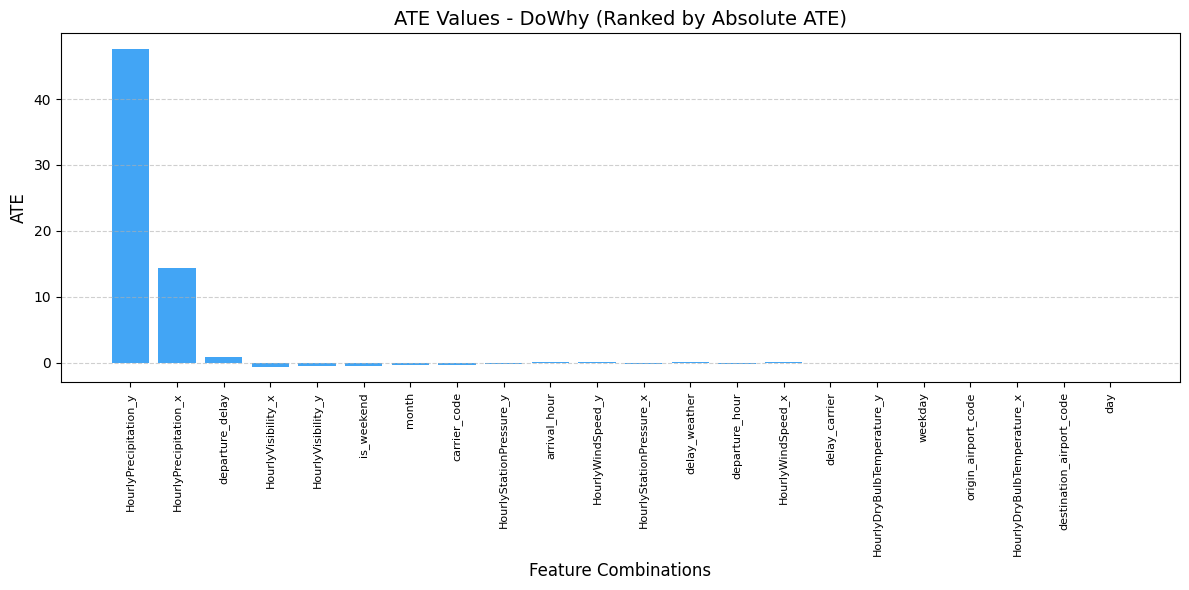

📊 Ranked DoWhy Features by Absolute ATE:
                       Feature        ATE    Abs_ATE  Rank
0        HourlyPrecipitation_y  47.549849  47.549849     1
1        HourlyPrecipitation_x  14.328633  14.328633     2
2              departure_delay   0.922126   0.922126     3
3           HourlyVisibility_x  -0.560960   0.560960     4
4           HourlyVisibility_y  -0.527690   0.527690     5
5                   is_weekend  -0.425622   0.425622     6
6                        month  -0.290780   0.290780     7
7                 carrier_code  -0.244108   0.244108     8
8      HourlyStationPressure_y  -0.199083   0.199083     9
9                 arrival_hour   0.120937   0.120937    10
10           HourlyWindSpeed_y   0.118875   0.118875    11
11     HourlyStationPressure_x  -0.115202   0.115202    12
12               delay_weather   0.112506   0.112506    13
13              departure_hour  -0.107143   0.107143    14
14           HourlyWindSpeed_x   0.061050   0.061050    15
15             

In [58]:
import matplotlib.pyplot as plt

# Load DoWhy results
df_dowhy = pd.read_csv("ate_ite_results_dowhy.csv")

# Clean feature name list if stored as stringified list
df_dowhy["Feature"] = df_dowhy["Feature"].apply(
    lambda x: ', '.join(eval(x)) if isinstance(x, str) and x.startswith("[") else x
)

# Add absolute ATE column
df_dowhy["Abs_ATE"] = df_dowhy["ATE"].abs()

# Sort by absolute ATE for clearer impact
df_dowhy = df_dowhy.sort_values(by="Abs_ATE", ascending=False).reset_index(drop=True)

# Add ranking column
df_dowhy["Rank"] = df_dowhy["Abs_ATE"].rank(ascending=False, method='dense').astype(int)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(df_dowhy["Feature"], df_dowhy["ATE"], color="#42A5F5")
plt.ylabel("ATE", fontsize=12)
plt.xlabel("Feature Combinations", fontsize=12)
plt.title("ATE Values - DoWhy (Ranked by Absolute ATE)", fontsize=14)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Print ranked data (optional)
print("📊 Ranked DoWhy Features by Absolute ATE:")
print(df_dowhy[['Feature', 'ATE', 'Abs_ATE', 'Rank']])

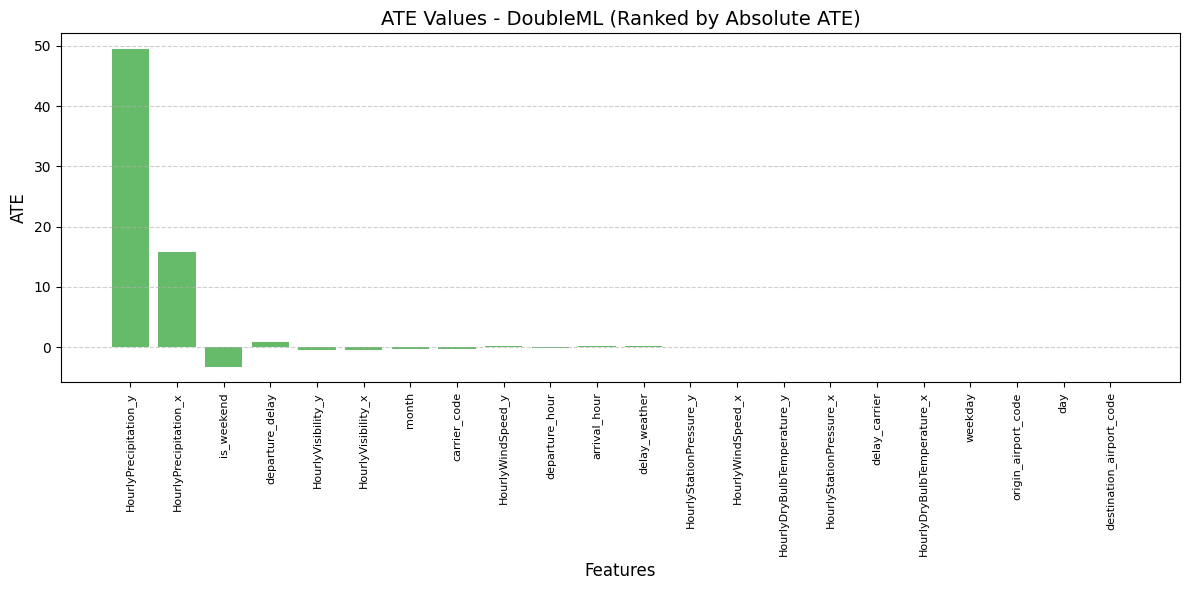

📊 Ranked DoubleML Features by Absolute ATE:
                       Feature        ATE    Abs_ATE  Rank
0        HourlyPrecipitation_y  49.430633  49.430633     1
1        HourlyPrecipitation_x  15.823554  15.823554     2
2                   is_weekend  -3.248648   3.248648     3
3              departure_delay   0.901461   0.901461     4
4           HourlyVisibility_y  -0.515393   0.515393     5
5           HourlyVisibility_x  -0.427334   0.427334     6
6                        month  -0.299786   0.299786     7
7                 carrier_code  -0.262391   0.262391     8
8            HourlyWindSpeed_y   0.131756   0.131756     9
9               departure_hour  -0.131055   0.131055    10
10                arrival_hour   0.097393   0.097393    11
11               delay_weather   0.097263   0.097263    12
12     HourlyStationPressure_y   0.085883   0.085883    13
13           HourlyWindSpeed_x   0.071708   0.071708    14
14  HourlyDryBulbTemperature_y  -0.042988   0.042988    15
15     Hourl

In [59]:
# Load DoubleML results
df_doubleml = pd.read_csv("ate_ite_results_doubleml.csv")

# Compute absolute ATE
df_doubleml["Abs_ATE"] = df_doubleml["ATE"].abs()

# Sort by absolute ATE
df_doubleml = df_doubleml.sort_values(by="Abs_ATE", ascending=False).reset_index(drop=True)

# Add rank
df_doubleml["Rank"] = df_doubleml["Abs_ATE"].rank(ascending=False, method='dense').astype(int)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(df_doubleml["Feature"], df_doubleml["ATE"], color="#66BB6A")
plt.ylabel("ATE", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.title("ATE Values - DoubleML (Ranked by Absolute ATE)", fontsize=14)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Print ranked table
print("📊 Ranked DoubleML Features by Absolute ATE:")
print(df_doubleml[['Feature', 'ATE', 'Abs_ATE', 'Rank']])

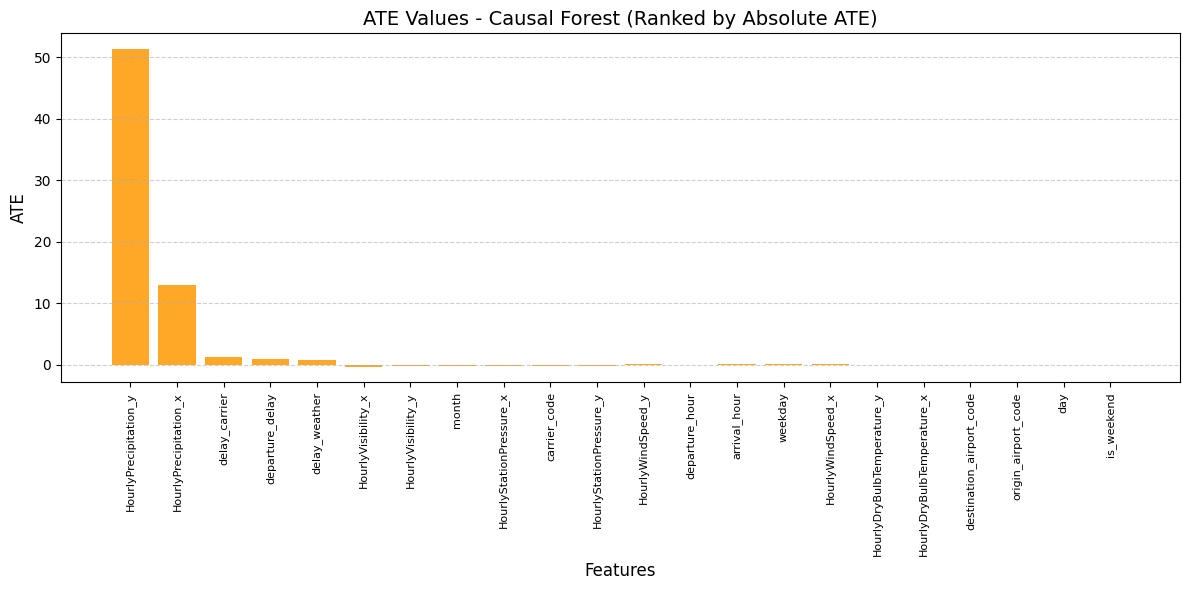

📊 Ranked Causal Forest Features by Absolute ATE:
                       Feature        ATE    Abs_ATE  Rank
0        HourlyPrecipitation_y  51.290411  51.290411     1
1        HourlyPrecipitation_x  12.932154  12.932154     2
2                delay_carrier   1.266983   1.266983     3
3              departure_delay   0.900633   0.900633     4
4                delay_weather   0.701615   0.701615     5
5           HourlyVisibility_x  -0.303656   0.303656     6
6           HourlyVisibility_y  -0.285574   0.285574     7
7                        month  -0.229363   0.229363     8
8      HourlyStationPressure_x  -0.151398   0.151398     9
9                 carrier_code  -0.136856   0.136856    10
10     HourlyStationPressure_y  -0.132926   0.132926    11
11           HourlyWindSpeed_y   0.102631   0.102631    12
12              departure_hour  -0.086842   0.086842    13
13                arrival_hour   0.082645   0.082645    14
14                     weekday   0.077619   0.077619    15
15     

In [61]:
# Load Causal Forest results
df_cf = pd.read_csv("ate_ite_results_causalforest.csv")

# Compute absolute ATE
df_cf["Abs_ATE"] = df_cf["ATE"].abs()

# Sort and rank
df_cf = df_cf.sort_values(by="Abs_ATE", ascending=False).reset_index(drop=True)
df_cf["Rank"] = df_cf["Abs_ATE"].rank(ascending=False, method='dense').astype(int)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(df_cf["Feature"], df_cf["ATE"], color="#FFA726")
plt.ylabel("ATE", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.title("ATE Values - Causal Forest (Ranked by Absolute ATE)", fontsize=14)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Print ranked table
print("📊 Ranked Causal Forest Features by Absolute ATE:")
print(df_cf[['Feature', 'ATE', 'Abs_ATE', 'Rank']])

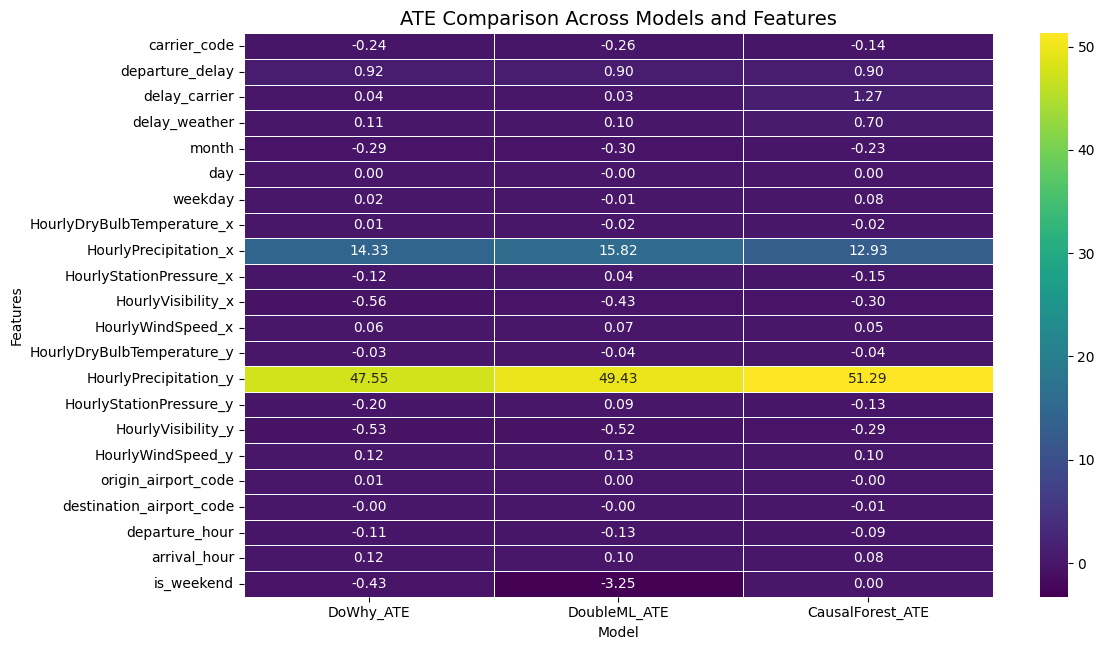

In [62]:
# Step 1: Stringify features for merging
def stringify(feature):
    return " + ".join(feature) if isinstance(feature, list) else str(feature)

results_df["Feature"] = results_df["Feature"].apply(stringify)
results_df2["Feature"] = results_df2["Feature"].apply(stringify)
results_df3["Feature"] = results_df3["Feature"].apply(stringify)

# Step 2: Merge the ATE values per feature across models
merged_df = results_df.rename(columns={"ATE": "DoWhy_ATE"}).merge(
    results_df2.rename(columns={"ATE": "DoubleML_ATE"}), on="Feature"
).merge(
    results_df3.rename(columns={"ATE": "CausalForest_ATE"}), on="Feature"
)

# Step 3: Pivot for heatmap (features as rows, models as columns)
pivot_df = merged_df[["Feature", "DoWhy_ATE", "DoubleML_ATE", "CausalForest_ATE"]]
pivot_df.set_index("Feature", inplace=True)

# Step 4: Plot heatmap of ATE values across features and models
plt.figure(figsize=(12, len(pivot_df) * 0.3))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="viridis", linewidths=0.5)
plt.title("ATE Comparison Across Models and Features", fontsize=14)
plt.xlabel("Model")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig("ate_model_feature_heatmap.png", dpi=300)
plt.show()

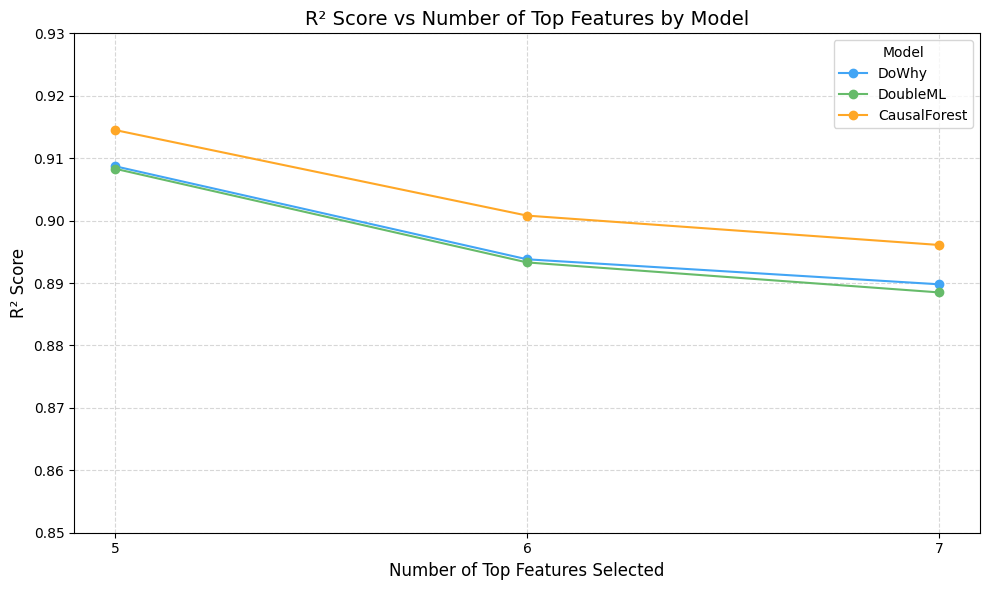

In [65]:
# R² scores for each model with different numbers of features
data = {
    'DoWhy':     [0.9087, 0.8938, 0.8898],  # for 5, 6, 7 features
    'DoubleML':  [0.9083, 0.8933, 0.8885],
    'CausalForest': [0.9145, 0.9008, 0.8961]
}

features = [5, 6, 7]
colors = {'DoWhy': '#42A5F5', 'DoubleML': '#66BB6A', 'CausalForest': '#FFA726'}

plt.figure(figsize=(10, 6))
for model, scores in data.items():
    plt.plot(features, scores, marker='o', label=model, color=colors[model])

plt.title("R² Score vs Number of Top Features by Model", fontsize=14)
plt.xlabel("Number of Top Features Selected", fontsize=12)
plt.ylabel("R² Score", fontsize=12)
plt.xticks(features)
plt.ylim(0.85, 0.93)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Model", fontsize=10)
plt.tight_layout()
plt.show()

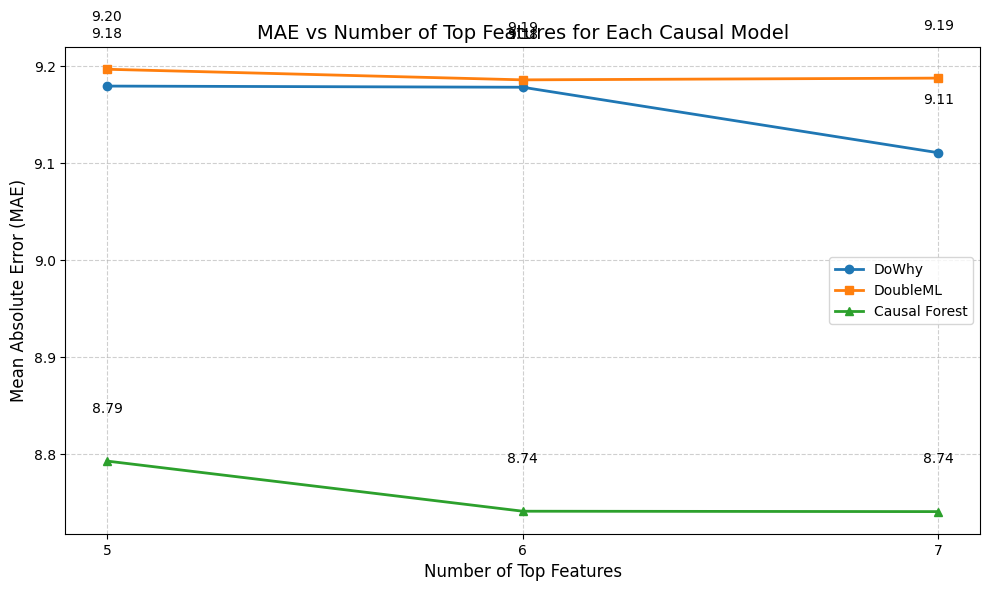

In [66]:
# Feature counts on X-axis
feature_counts = [5, 6, 7]

# MAE values for each model
mae_dowhy = [9.1790, 9.1778, 9.1104]
mae_doubleml = [9.1963, 9.1854, 9.1872]
mae_causalforest = [8.7932, 8.7416, 8.7412]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(feature_counts, mae_dowhy, marker='o', label='DoWhy', linewidth=2)
plt.plot(feature_counts, mae_doubleml, marker='s', label='DoubleML', linewidth=2)
plt.plot(feature_counts, mae_causalforest, marker='^', label='Causal Forest', linewidth=2)

# Annotations for clarity
for x, y in zip(feature_counts, mae_dowhy):
    plt.text(x, y + 0.05, f'{y:.2f}', ha='center')
for x, y in zip(feature_counts, mae_doubleml):
    plt.text(x, y + 0.05, f'{y:.2f}', ha='center')
for x, y in zip(feature_counts, mae_causalforest):
    plt.text(x, y + 0.05, f'{y:.2f}', ha='center')

# Labels and aesthetics
plt.xticks(feature_counts)
plt.xlabel("Number of Top Features", fontsize=12)
plt.ylabel("Mean Absolute Error (MAE)", fontsize=12)
plt.title("MAE vs Number of Top Features for Each Causal Model", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

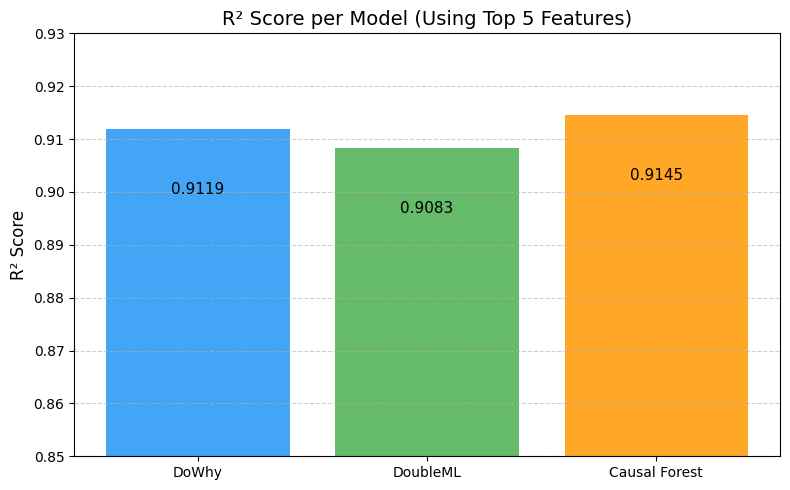

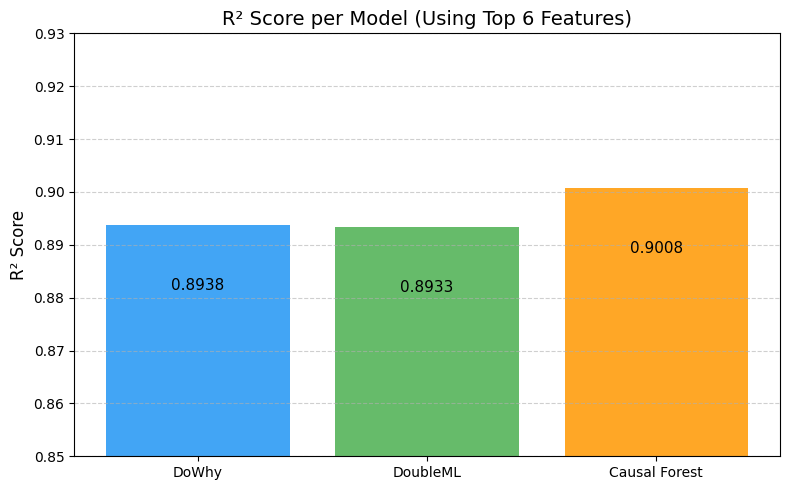

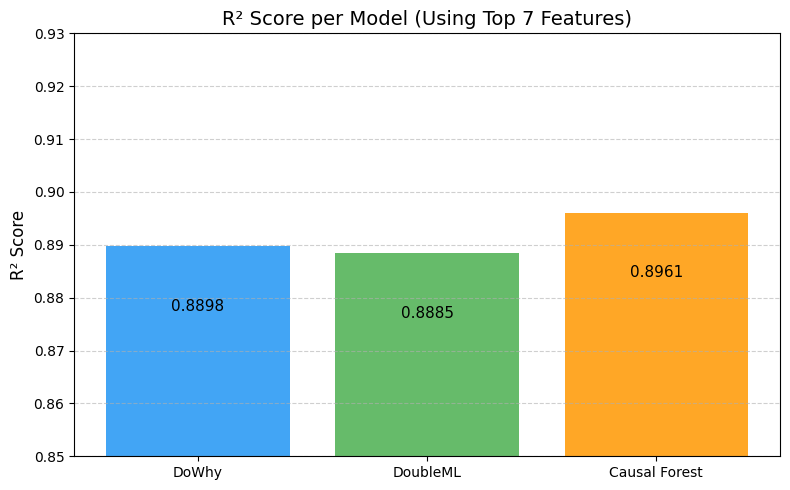

In [67]:
# Define data
models = ['DoWhy', 'DoubleML', 'Causal Forest']

# R² scores for different feature counts
r2_scores_5 = [0.9119, 0.9083, 0.9145]
r2_scores_6 = [0.8938, 0.8933, 0.9008]
r2_scores_7 = [0.8898, 0.8885, 0.8961]

# Function to plot R² scores
def plot_r2_scores(r2_scores, feature_count):
    plt.figure(figsize=(8, 5))
    bars = plt.bar(models, r2_scores, color=['#42A5F5', '#66BB6A', '#FFA726'])
    
    for bar, score in zip(bars, r2_scores):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.01,
                 f'{score:.4f}', ha='center', va='top', color='black', fontsize=11)

    plt.ylabel('R² Score', fontsize=12)
    plt.title(f'R² Score per Model (Using Top {feature_count} Features)', fontsize=14)
    plt.ylim(0.85, 0.93)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Plot for 5, 6, and 7 features
plot_r2_scores(r2_scores_5, 5)
plot_r2_scores(r2_scores_6, 6)
plot_r2_scores(r2_scores_7, 7)

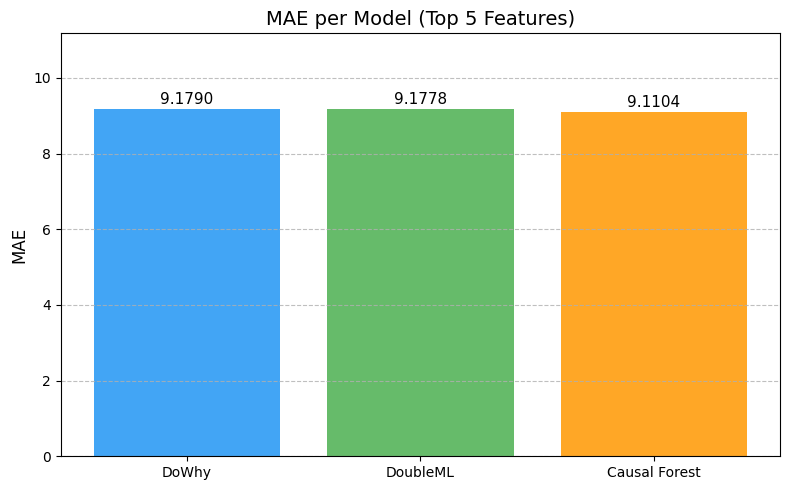

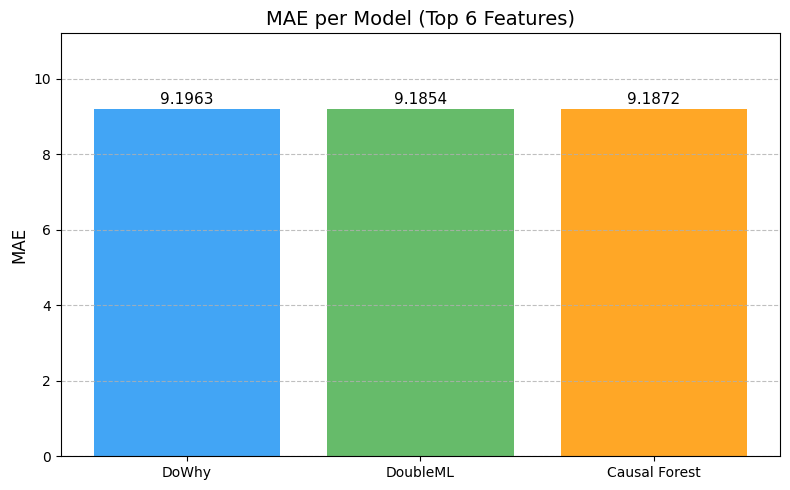

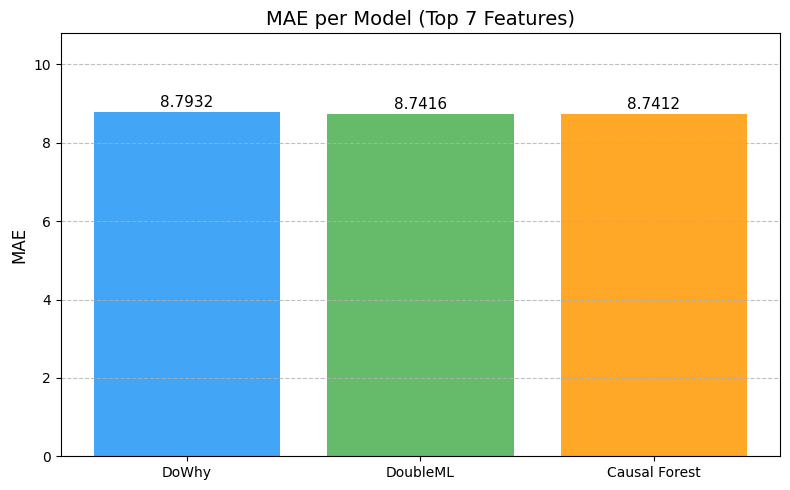

In [73]:
models = ['DoWhy', 'DoubleML', 'Causal Forest']
feature_counts = [5, 6, 7]

# MAE scores
mae_scores = {
    5 : [9.1790, 9.1778, 9.1104],
    6 : [9.1963, 9.1854, 9.1872],
    7 : [8.7932, 8.7416, 8.7412]
}

# Plotting
for feature_count in feature_counts:
    plt.figure(figsize=(8, 5))
    bars = plt.bar(models, mae_scores[feature_count], color=['#42A5F5', '#66BB6A', '#FFA726'])

    # Annotate bars
    for bar, val in zip(bars, mae_scores[feature_count]):
        plt.text(bar.get_x() + bar.get_width() / 2, val + 0.05, f'{val:.4f}',
                 ha='center', va='bottom', fontsize=11)

    plt.ylabel('MAE', fontsize=12)
    plt.title(f'MAE per Model (Top {feature_count} Features)', fontsize=14)
    plt.ylim(0, max(mae_scores[feature_count]) + 2)
    plt.grid(axis='y', linestyle='--', alpha=0.8)
    plt.tight_layout()
    plt.show()

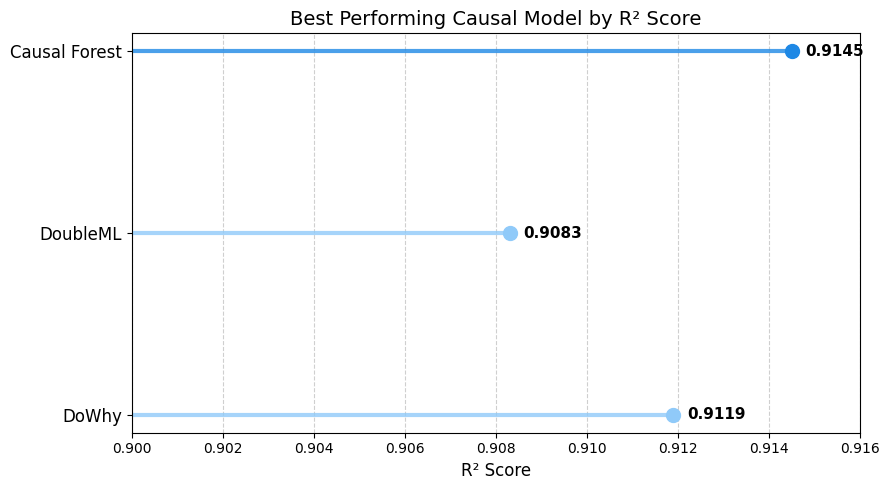

In [75]:
# R² scores for models using top 7 features
models = ['DoWhy', 'DoubleML', 'Causal Forest']
r2_scores = [0.9119, 0.9083, 0.9145]

# Identify best score and its index
best_score = max(r2_scores)
best_index = r2_scores.index(best_score)

# Plot
plt.figure(figsize=(9, 5))
for i, (model, score) in enumerate(zip(models, r2_scores)):
    color = '#1E88E5' if i == best_index else '#90CAF9'
    plt.plot(score, i, 'o', color=color, markersize=10)
    plt.hlines(y=i, xmin=0.900, xmax=score, color=color, linewidth=3, alpha=0.8)

# Highlight the best model label
for i, (model, score) in enumerate(zip(models, r2_scores)):
    plt.text(score + 0.0003, i, f'{score:.4f}', va='center', fontsize=11, weight='bold')

plt.yticks(range(len(models)), models, fontsize=12)
plt.xlabel('R² Score', fontsize=12)
plt.title('Best Performing Causal Model by R² Score', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xlim(0.900, 0.916)
plt.tight_layout()
plt.show()